Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
- [x] Is your problem regression or classification?
- [X] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [x] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [x] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [x] Begin to clean and explore your data.
- [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

## My Problem is a classification. I try to predict the label of each game 
## My target is esrb_rating
## I will use recall and precision
## The data set already has a test file. I will use train_test_split to split randomly for train and validation test
## There is no missing value and all the features are binary so there will be no leakage because I don't use any encoder, imputer technique
## I use title as index column
## X is data frame without esrb_rating and y is data frame for column esrb_rating

# I. Wrangle Data

In [46]:
DATA_PATH ='data/esrb/'

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, plot_confusion_matrix, precision_score, recall_score, classification_report

In [48]:
def wrangle(fm_path):
    df = pd.read_csv(DATA_PATH + fm_path,
    index_col='title')
    return df
pd.set_option('display.max_columns', None)

In [49]:
df = wrangle('Video_games_esrb_rating.csv')
X_test = wrangle('test_esrb.csv')

# II. Data Exploration

In [50]:
df.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,M
Jamestown+,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,T


In [51]:
df.shape

(1895, 33)

In [52]:
df.isna().sum().sum()

0

In [53]:
df['console'].value_counts()

0    994
1    901
Name: console, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1895 entries, Monster Jam Steel Titans 2 to Surf World Series
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   console                   1895 non-null   int64 
 1   alcohol_reference         1895 non-null   int64 
 2   animated_blood            1895 non-null   int64 
 3   blood                     1895 non-null   int64 
 4   blood_and_gore            1895 non-null   int64 
 5   cartoon_violence          1895 non-null   int64 
 6   crude_humor               1895 non-null   int64 
 7   drug_reference            1895 non-null   int64 
 8   fantasy_violence          1895 non-null   int64 
 9   intense_violence          1895 non-null   int64 
 10  language                  1895 non-null   int64 
 11  lyrics                    1895 non-null   int64 
 12  mature_humor              1895 non-null   int64 
 13  mild_blood                1895 non-null   int

# III. Split Data

In [55]:
target = 'esrb_rating'
X = df.drop(columns=target)
y = df[target]

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# IV. Establish Baseline

In [60]:
y_train.value_counts(normalize=True).max()

0.3608179419525066

In [19]:
model_rf = RandomForestClassifier(random_state=42,
                                n_jobs=-2)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-2, random_state=42)

# V. Check Metrics

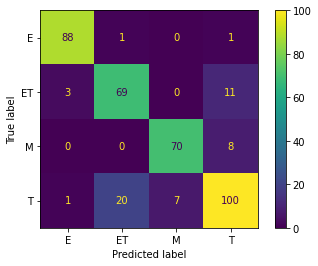

In [20]:
plot_confusion_matrix(model_rf, X_val, y_val)
plt.show()

# VI. Tune Model